In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
from tqdm import tqdm as tqdm
import datetime

In [28]:
page_path_whole = '/home3/r05322021/Desktop/FB Data/Polarization/page_score/whole/'
page_score_file_whole = os.listdir(page_path_whole)
page_path_all = '/home3/r05322021/Desktop/FB Data/original_ideology/page_score/2015-05-03_to_2016-11-26_4weeks/'
page_score_file_all = os.listdir(page_path_all)

In [30]:
df_whole_list, df_all_list = [], []
for f in page_score_file_whole:
    df = pd.read_csv(f'{page_path_whole}{f}', converters={'page_id': str})
    df['Week'] = f[-14:-4]
    df_whole_list.append(df)
for f in page_score_file_all:
    df = pd.read_csv(f'{page_path_all}{f}', converters={'page_id': str})
    df['Week'] = f[-14:-4]
    df_all_list.append(df)
df_whole = pd.concat(df_whole_list, axis=0)
df_all = pd.concat(df_all_list, axis=0)

In [31]:
std_whole = pd.DataFrame([[d['Week'].iloc[0], d['PC1_std'].std()] for d in [group[1] for group in df_whole.groupby('Week')]], columns=['Week', 'std'])
std_all = pd.DataFrame([[d['Week'].iloc[0], d['PC1_std'].std()] for d in [group[1] for group in df_all.groupby('Week')]], columns=['Week', 'std'])

In [58]:
def plot_time_series(df_all, df_whole, timecol, ycol, plot_title, save_path):
    plt.figure(figsize=(15,10))
    df = pd.concat([df_all.set_index(timecol).sort_index().rename(columns={'std': 'All'}), df_whole.set_index(timecol).sort_index().rename(columns={'std': 'Whole'})], axis=1)
    df = df.reset_index(drop=False)
    df = df.melt(timecol, var_name='user_type',  value_name=ycol)
    
    colors = ["r", "royalblue"]
    ax = sns.pointplot(x=timecol, y=ycol, hue='user_type', data=df, palette=sns.color_palette(colors))
    ax.set(xlabel=timecol, ylabel=ycol)
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
        
    plt.savefig(save_path)
    plt.show()

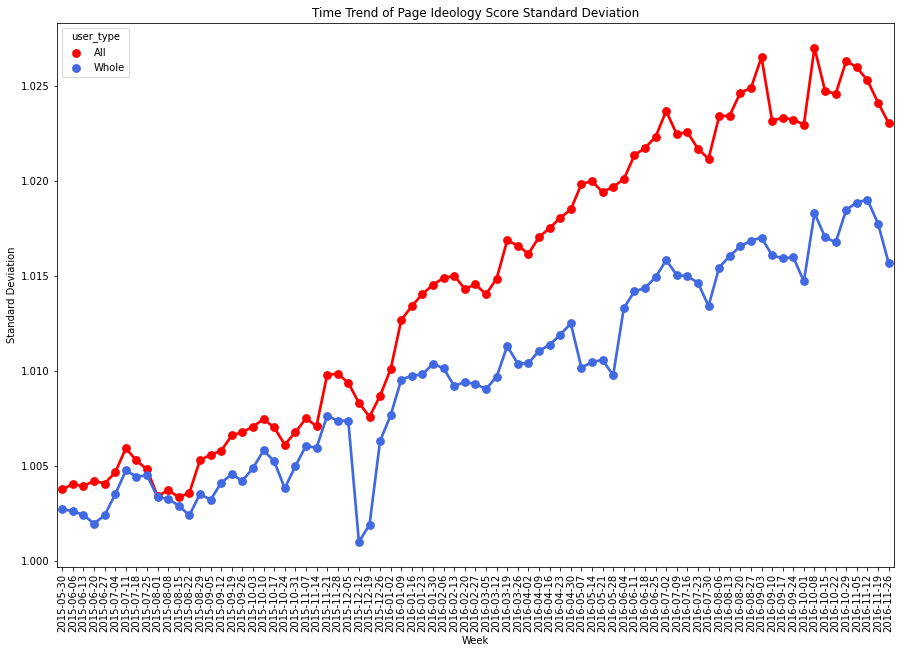

In [59]:
plot_time_series(std_all, std_whole, 'Week', 'Standard Deviation', 'Time Trend of Page Ideology Score Standard Deviation', '/home3/r05322021/Desktop/FB_hatecrime/Plot/polarization/FB/page/old_all.pdf')